In [3]:
import pyodbc
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
servername = 'LNOR010941'
db = 'NYCTaxi_Sample'

In [4]:
# sql query
query_str='''
select [passenger_count], convert(varchar(2),[pickup_datetime],108) as hour_num, pickup_datetime,  [pickup_longitude]
      ,[pickup_latitude]
      ,[dropoff_longitude]
      ,[dropoff_latitude]
      ,[fare_amount] 
      from [dbo].[nyctaxi_sample]
'''
conn_str = 'Driver=SQL Server;Server=' + servername + \
    ';Database=' + db + ';Trusted_Connection=True;'
cnxn = pyodbc.connect(conn_str)
#cursor = cnxn.cursor()

# Load query into dataframe
df=pd.read_sql(query_str,cnxn)

In [19]:
#calculateDistance
lat1=df.pickup_latitude.astype(float)/57.2958
long1=df.pickup_longitude.astype(float)/57.2958
lat2=df.dropoff_latitude.astype(float)/57.2958
long2=df.dropoff_longitude.astype(float)/57.2958

distance=(np.sin(lat1)*np.sin(lat2))+(np.cos(lat1)*np.cos(lat2)*np.cos(long2-long1))

In [20]:
distance


0          1.000000
1          1.000000
2          1.000000
3          1.000000
4          1.000000
5          1.000000
6          1.000000
7          1.000000
8          1.000000
9          1.000000
10         1.000000
11         1.000000
12         1.000000
13         1.000000
14         1.000000
15         1.000000
16         1.000000
17         1.000000
18         1.000000
19         1.000000
20         1.000000
21         1.000000
22         1.000000
23         1.000000
24         1.000000
25         1.000000
26         1.000000
27         1.000000
28         1.000000
29         1.000000
             ...   
1703927    0.999997
1703928    0.999997
1703929    0.999986
1703930    0.999996
1703931    1.000000
1703932    0.999996
1703933    0.999998
1703934    0.999996
1703935    0.999995
1703936    0.999996
1703937    1.000000
1703938    1.000000
1703939    0.999996
1703940    0.999996
1703941    0.999996
1703942    0.999996
1703943    0.999997
1703944    0.999995
1703945    0.999996


In [15]:
lat1=df.pickup_latitude.astype(float)/57.2958

In [17]:
(np.sin(lat1)*np.sin(lat1))

0          0.426074
1          0.426157
2          0.426110
3          0.425742
4          0.426440
5          0.425550
6          0.426754
7          0.425299
8          0.426117
9          0.425558
10         0.426080
11         0.426670
12         0.426819
13         0.426610
14         0.426221
15         0.426395
16         0.425920
17         0.425532
18         0.426150
19         0.426344
20         0.425916
21         0.426356
22         0.426527
23         0.426749
24         0.425948
25         0.425619
26         0.426271
27         0.425856
28         0.426669
29         0.426234
             ...   
1703927    0.425758
1703928    0.424910
1703929    0.426071
1703930    0.426319
1703931    0.426755
1703932    0.426225
1703933    0.425334
1703934    0.426180
1703935    0.426463
1703936    0.426011
1703937    0.425799
1703938    0.425921
1703939    0.426235
1703940    0.426099
1703941    0.426333
1703942    0.426418
1703943    0.425869
1703944    0.426392
1703945    0.426216


In [23]:
# function to output an array of distances between coordinates
def coordinates2distance(lat1,lat2,long1,long2):
    R=6373.0 #radius of earth in km
    dlon=long2-long1
    dlat=lat2-lat1
    a=(np.sin(dlat/2)**2)+(np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2)
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [24]:
lat1=np.radians(df.pickup_latitude.astype(float))
long1=np.radians(df.pickup_longitude.astype(float))
lat2=np.radians(df.dropoff_latitude.astype(float))
long2=np.radians(df.dropoff_longitude.astype(float))

In [26]:
distance=coordinates2distance(lat1,lat2,long1,long2) #km

In [27]:
distance

0           1.322624
1           1.128517
2           0.982869
3           1.160337
4           1.294193
5           1.023438
6           0.877797
7           0.962745
8           1.174000
9           1.113500
10          0.839791
11          1.270646
12          1.393563
13          1.303368
14          1.052385
15          0.954244
16          1.303305
17          0.878653
18          0.930293
19          0.848504
20          1.008195
21          1.256412
22          1.213436
23          0.714277
24          0.979780
25          1.088331
26          0.908519
27          1.157619
28          1.092990
29          0.792015
             ...    
1703927    16.240439
1703928    15.615869
1703929    33.750790
1703930    18.766066
1703931     0.011656
1703932    17.190008
1703933    13.528081
1703934    19.001266
1703935    20.702963
1703936    17.128572
1703937     3.238562
1703938     0.210372
1703939    18.916370
1703940    17.353607
1703941    18.331319
1703942    19.007017
1703943    16

In [28]:
df['distance']=distance

In [29]:
df.head()

,passenger_count,hour_num,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,distance
0,1,12,-73.98864,40.748764,-74.002075,40.754913,5.5,1.322624
1,1,06,-73.980888,40.753613,-73.977753,40.763477,5.5,1.128517
2,1,12,-73.986847,40.750877,-73.979164,40.757526,5.5,0.982869
3,1,11,-73.978096,40.72953,-73.988503,40.736359,5.5,1.160337
4,1,10,-73.987923,40.769955,-73.981415,40.780495,5.5,1.294193


In [32]:
df[['hour_num','passenger_count']].head()

,hour_num,passenger_count
0,12,1
1,06,1
2,12,1
3,11,1
4,10,1


In [34]:
df['day']=np.zeros(len(df['hour_num']))#list of 0s
df['day']=[ 1 for row in df['hour_num'] if row >6 and row <21 ]

TypeError: '>' not supported between instances of 'str' and 'int'

In [36]:
np.zeros(len(df['hour_num']))

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
list1=[  for row in df['hour_num'] if row >6 and row <21 ]

for row in df['hour_num']:
    if  row >6 and row <21:
        y=


TypeError: '>' not supported between instances of 'str' and 'int'

## Plot heatmap of pickups and dropoffs within NYC


In [ ]:
df['dropoff_latitude_n']=pd.to_numeric(df['dropoff_latitude'])
df['dropoff_longitude_n']=pd.to_numeric(df['dropoff_longitude'])
df['pickup_latitude_n']=pd.to_numeric(df['pickup_latitude'])
df['pickup_longitude_n']=pd.to_numeric(df['pickup_longitude'])

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df.plot(kind='scatter', x='dropoff_longitude_n', y='dropoff_latitude_n',
                c='g', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

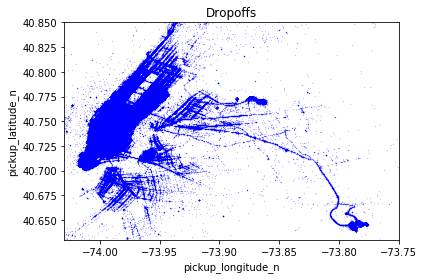

In [13]:
df.plot(kind='scatter', x='pickup_longitude_n', y='pickup_latitude_n',
                c='b', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

## In the scatter plot, we saw the high density of pickups and dropoffs from and to JFK and La Guardia Airport


In [15]:
JFK={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
JFK_center=[40.6437,-73.7900]
# Get all pickups to JFK
JFK_data=df.loc[(df.pickup_latitude_n>=JFK['min_lat']) & (df.pickup_latitude_n<=JFK['max_lat'])]
JFK_data=JFK_data.loc[(df.pickup_longitude_n>=JFK['min_lng']) & (df.pickup_longitude_n<=JFK['max_lng'])]

print("Number of Trips with Pickups from JFK",JFK_data.shape[0])

JFK_dropoff=df.loc[(df.dropoff_latitude_n>=JFK['min_lat']) & (df.dropoff_latitude_n<=JFK['max_lat'])]
JFK_dropoff=JFK_dropoff.loc[(df.dropoff_longitude_n>=JFK['min_lng']) & (df.dropoff_longitude_n<=JFK['max_lng'])]

print("Number of Trips with Dropoffs to JFK",JFK_dropoff.shape[0])


Number of Trips with Pickups from JFK 27851
Number of Trips with Dropoffs to JFK 13613


C:\Users\sstavlan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sstavlan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\sstavlan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\sstavlan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sstavlan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two co

Text(0.5,1,'Fare Amount Distribution')

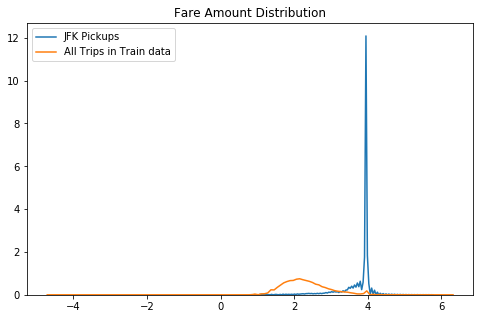

In [17]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_data['fare_amount'].values),label='JFK Pickups')
#sns.kdeplot(np.log(JFK_dropoff['fare_amount'].values),label='JFK Dropoff')
sns.kdeplot(np.log(df['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution")

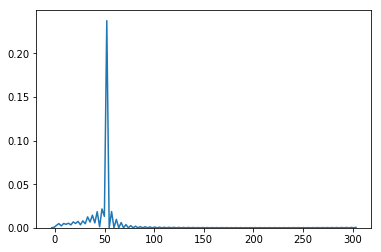

In [18]:
sns.kdeplot(JFK_data['fare_amount'].values)

In [19]:
del JFK_data
del JFK
del JFK_dropoff

In [20]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [21]:
#tar litt tid å kjøre denne
df['is_pickup_JFK']=df.apply(lambda row:isAirport(row['pickup_latitude_n'],row['pickup_longitude_n'],'JFK'),axis=1)
df['is_dropoff_JFK']=df.apply(lambda row:isAirport(row['dropoff_latitude_n'],row['dropoff_longitude_n'],'JFK'),axis=1)
df['is_pickup_EWR']=df.apply(lambda row:isAirport(row['pickup_latitude_n'],row['pickup_longitude_n'],'EWR'),axis=1)
df['is_dropoff_EWR']=df.apply(lambda row:isAirport(row['dropoff_latitude_n'],row['dropoff_longitude_n'],'EWR'),axis=1)
df['is_pickup_la_guardia']=df.apply(lambda row:isAirport(row['pickup_latitude_n'],row['pickup_longitude_n'],'LaGuardia'),axis=1)
df['is_dropoff_la_guardia']=df.apply(lambda row:isAirport(row['dropoff_latitude_n'],row['dropoff_longitude_n'],'LaGuardia'),axis=1)

In [22]:
def coordinates2distance(lat1,lat2,long1,long2):
    R=6373.0 #radius of earth in km
    dlon=long2-long1
    dlat=lat2-lat1
    a=(np.sin(dlat/2)**2)+(np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2)
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [23]:
df['distance']=coordinates2distance(df['pickup_latitude_n'].values,df['dropoff_latitude_n'].values,df['pickup_longitude_n'].values,df['dropoff_longitude_n'].values)

In [24]:
df

,passenger_count,hour_num,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,dropoff_latitude_n,dropoff_longitude_n,pickup_latitude_n,pickup_longitude_n,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,distance
0,1,12,2013-11-17 12:26:45,-73.98864,40.748764,-74.002075,40.754913,5.5,40.754913,-74.002075,40.748764,-73.988640,0,0,0,0,0,0,93.855737
1,1,06,2013-11-20 06:33:57,-73.980888,40.753613,-73.977753,40.763477,5.5,40.763477,-73.977753,40.753613,-73.980888,0,0,0,0,0,0,65.941443
2,1,12,2013-12-21 12:57:03,-73.986847,40.750877,-73.979164,40.757526,5.5,40.757526,-73.979164,40.750877,-73.986847,0,0,0,0,0,0,64.615077
3,1,11,2013-12-08 11:09:52,-73.978096,40.72953,-73.988503,40.736359,5.5,40.736359,-73.988503,40.729530,-73.978096,0,0,0,0,0,0,79.006603
4,1,10,2013-10-21 10:58:58,-73.987923,40.769955,-73.981415,40.780495,5.5,40.780495,-73.981415,40.769955,-73.987923,0,0,0,0,0,0,78.897619
5,1,13,2013-10-31 13:38:26,-74.000748,40.718441,-73.988609,40.718552,5.5,40.718552,-73.988609,40.718441,-74.000748,0,0,0,0,0,0,76.788125
6,1,17,2013-12-14 17:42:00,-73.971077,40.788174,-73.979683,40.783722,5.5,40.783722,-73.979683,40.788174,-73.971077,0,0,0,0,0,0,61.677200
7,1,13,2013-12-07 13:06:17,-74.014412,40.703903,-74.003571,40.706619,5.5,40.706619,-74.003571,40.703903,-74.014412,0,0,0,0,0,0,70.611276
8,1,14,2013-11-02 14:58:16,-73.994019,40.751293,-73.981377,40.746857,5.5,40.746857,-73.981377,40.751293,-73.994019,0,0,0,0,0,0,85.064603
9,1,09,2013-10-06 09:42:16,-74.010429,40.71891,-74.008064,40.709061,5.5,40.709061,-74.008064,40.718910,-74.010429,0,0,0,0,0,0,64.523799


In [ ]:
https://github.com/AiswaryaSrinivas/DataScienceWithPython/blob/master/New%20York%20Taxi%20Fare%20Prediction/eda-and-feature-engineering.ipynb
    
    https://medium.com/analytics-vidhya/machine-learning-to-predict-taxi-fare-part-one-exploratory-analysis-6b7e6b1fbc78